In [19]:
import os
import json
import pandas as pd
from Bio import SeqIO

# Define file paths
base_dir = "ncbi_dataset/ncbi_dataset/data/GCF_000001405.40"
fasta_path = os.path.join(base_dir, "GCF_000001405.40_GRCh38.p14_genomic.fna")
gff_path = os.path.join(base_dir, "genomic.gff")
gtf_path = os.path.join(base_dir, "genomic.gtf")
gbff_path = os.path.join(base_dir, "genomic.gbff")
sequence_report_path = os.path.join(base_dir, "sequence_report.jsonl")
assembly_data_report_path = "ncbi_dataset/ncbi_dataset/data/assembly_data_report.jsonl"
dataset_catalog_path = "ncbi_dataset/ncbi_dataset/data/dataset_catalog.json"


In [21]:
# Load sequence report JSONL file into a DataFrame
sequence_report = []

with open(sequence_report_path) as f:
    for line in f:
        sequence_data = json.loads(line)
        sequence_report.append(sequence_data)

# Convert to DataFrame
sequence_report_df = pd.DataFrame(sequence_report)
print("Sequence Report Overview:")
print(sequence_report_df.head())


Sequence Report Overview:
  assemblyAccession      assemblyUnit assignedMoleculeLocationType chrName  \
0  GCF_000001405.40  Primary Assembly                   Chromosome       1   
1  GCF_000001405.40  Primary Assembly                   Chromosome       2   
2  GCF_000001405.40  Primary Assembly                   Chromosome       3   
3  GCF_000001405.40  Primary Assembly                   Chromosome       4   
4  GCF_000001405.40  Primary Assembly                   Chromosome       5   

     gcCount  gcPercent genbankAccession     length refseqAccession  \
0  103674491       41.5       CM000663.2  248956422    NC_000001.11   
1  101284083       40.5       CM000664.2  242193529    NC_000002.12   
2   91922884       40.0       CM000665.2  198295559    NC_000003.12   
3   76972588       38.5       CM000666.2  190214555    NC_000004.12   
4   93718374       39.5       CM000667.2  181538259    NC_000005.10   

                 role sequenceName ucscStyleName  unlocalizedCount  
0  assemb

In [22]:
# Load the FASTA file and calculate GC content and length
sequence_data = []

for record in SeqIO.parse(fasta_path, "fasta"):
    seq_id = record.id
    description = record.description
    sequence = str(record.seq)
    gc_content = (sequence.count("G") + sequence.count("C")) / len(sequence) * 100
    length = len(sequence)

    sequence_data.append({
        "Sequence_ID": seq_id,
        "Description": description,
        "GC_Content": gc_content,
        "Length": length
    })

# Convert to DataFrame
sequence_df = pd.DataFrame(sequence_data)
print("FASTA File Overview:")
print(sequence_df.head())


FASTA File Overview:
    Sequence_ID                                        Description  \
0  NC_000001.11  NC_000001.11 Homo sapiens chromosome 1, GRCh38...   
1   NT_187361.1  NT_187361.1 Homo sapiens chromosome 1 unlocali...   
2   NT_187362.1  NT_187362.1 Homo sapiens chromosome 1 unlocali...   
3   NT_187363.1  NT_187363.1 Homo sapiens chromosome 1 unlocali...   
4   NT_187364.1  NT_187364.1 Homo sapiens chromosome 1 unlocali...   

   GC_Content     Length  
0   25.113731  248956422  
1   25.043558     175055  
2   17.235889      32032  
3   17.556116     127682  
4   14.350882      66860  


In [23]:
# Load GFF file and filter for gene entries
annotations = pd.read_csv(gff_path, sep="\t", comment="#", header=None,
                          names=["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"])

# Filter for 'gene' type entries only
genes_df = annotations[annotations["type"] == "gene"]

# Extract gene names from attributes if available
genes_df['Gene'] = genes_df['attributes'].str.extract(r'ID=gene-([^;]+)')
print("GFF Gene Annotations Overview:")
print(genes_df.head())


GFF Gene Annotations Overview:
           seqid      source  type  start    end score strand phase  \
19  NC_000001.11  BestRefSeq  gene  17369  17436     .      -     .   
28  NC_000001.11      Gnomon  gene  29774  35418     .      +     .   
33  NC_000001.11  BestRefSeq  gene  30366  30503     .      +     .   
38  NC_000001.11  BestRefSeq  gene  34611  36081     .      -     .   
45  NC_000001.11  BestRefSeq  gene  65419  71585     .      +     .   

                                           attributes         Gene  
19  ID=gene-MIR6859-1;Dbxref=GeneID:102466751,HGNC...    MIR6859-1  
28  ID=gene-MIR1302-2HG;Dbxref=GeneID:107985730,HG...  MIR1302-2HG  
33  ID=gene-MIR1302-2;Dbxref=GeneID:100302278,HGNC...    MIR1302-2  
38  ID=gene-FAM138A;Dbxref=GeneID:645520,HGNC:HGNC...      FAM138A  
45  ID=gene-OR4F5;Dbxref=GeneID:79501,HGNC:HGNC:14...        OR4F5  


/var/folders/6l/w2fcn1fx74n1phx_nvrsqn5c0000gn/T/ipykernel_1342/4148990227.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes_df['Gene'] = genes_df['attributes'].str.extract(r'ID=gene-([^;]+)')


In [24]:
# Load GBFF file to extract gene information
gbff_data = []

for record in SeqIO.parse(gbff_path, "genbank"):
    for feature in record.features:
        if feature.type == "gene":
            gene_name = feature.qualifiers.get("gene", ["N/A"])[0]
            location = feature.location
            gbff_data.append({
                "Gene": gene_name,
                "Location": str(location),
                "Length": len(location)
            })

# Convert to DataFrame
gbff_df = pd.DataFrame(gbff_data)
print("GenBank File Gene Annotations Overview:")
print(gbff_df.head())


GenBank File Gene Annotations Overview:
          Gene          Location  Length
0      DDX11L1  [11873:14409](+)    2536
1       WASH7P  [14361:29370](-)   15009
2    MIR6859-1  [17368:17436](-)      68
3  MIR1302-2HG  [29773:35418](+)    5645
4    MIR1302-2  [30365:30503](+)     138


In [25]:
# Merge sequence metadata with sequence properties
merged_df = pd.merge(sequence_report_df, sequence_df, left_on='refseqAccession', right_on='Sequence_ID', how='outer')
# Merge gene annotations from GFF with the combined metadata and sequence data
merged_df = pd.merge(merged_df, genes_df, left_on='refseqAccession', right_on='seqid', how='outer')
# Merge GenBank gene data on gene names
final_merged_df = pd.merge(merged_df, gbff_df, on='Gene', how='outer')


In [26]:
final_merged_df.to_csv("consolidated_genome_data.csv", index=False)
print("Data has been merged and saved to 'consolidated_genome_data.csv'")
final_merged_df

Data has been merged and saved to 'consolidated_genome_data.csv'


,assemblyAccession,assemblyUnit,assignedMoleculeLocationType,chrName,gcCount,gcPercent,genbankAccession,length,refseqAccession,role,...,type,start,end,score,strand,phase,attributes,Gene,Location,Length_y
0,GCF_000001405.40,Primary Assembly,Chromosome,19,32693605,48.0,CM000681.2,58617616.0,NC_000019.10,assembled-molecule,...,gene,58345183.0,58353492.0,.,-,.,"ID=gene-A1BG;Dbxref=GeneID:1,HGNC:HGNC:5,MIM:1...",A1BG,[58345182:58353492](-),8310.0
1,GCF_000001405.40,Primary Assembly,Chromosome,19,32693605,48.0,CM000681.2,58617616.0,NC_000019.10,assembled-molecule,...,gene,58351970.0,58355183.0,.,+,.,"ID=gene-A1BG-AS1;Dbxref=GeneID:503538,HGNC:HGN...",A1BG-AS1,[58351969:58355183](+),3214.0
2,GCF_000001405.40,Primary Assembly,Chromosome,10,59342366,41.5,CM000672.2,133797422.0,NC_000010.11,assembled-molecule,...,gene,50799409.0,50885627.0,.,-,.,"ID=gene-A1CF;Dbxref=GeneID:29974,HGNC:HGNC:240...",A1CF,[50799408:50885627](-),86219.0
3,GCF_000001405.40,Primary Assembly,Chromosome,12,58038673,41.0,CM000674.2,133275309.0,NC_000012.12,assembled-molecule,...,gene,9067708.0,9116229.0,.,-,.,"ID=gene-A2M;Dbxref=GeneID:2,HGNC:HGNC:7,MIM:10...",A2M,[9067707:9116229](-),48522.0
4,GCF_000001405.40,Primary Assembly,Chromosome,12,58038673,41.0,CM000674.2,133275309.0,NC_000012.12,assembled-molecule,...,gene,9065177.0,9068055.0,.,+,.,"ID=gene-A2M-AS1;Dbxref=GeneID:144571,HGNC:HGNC...",A2M-AS1,[9065176:9068055](+),2879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73093,GCF_000001405.40,PATCHES,Chromosome,13,NaN,NaN,ML143364.1,158944.0,NW_021160010.1,fix-patch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73094,GCF_000001405.40,PATCHES,Chromosome,22,NaN,NaN,ML143379.1,12295.0,NW_021160025.1,fix-patch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73095,GCF_000001405.40,PATCHES,Chromosome,X,NaN,NaN,ML143383.1,68192.0,NW_021160029.1,fix-patch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73096,GCF_000001405.40,PATCHES,Chromosome,X,NaN,NaN,ML143384.1,14678.0,NW_021160030.1,fix-patch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


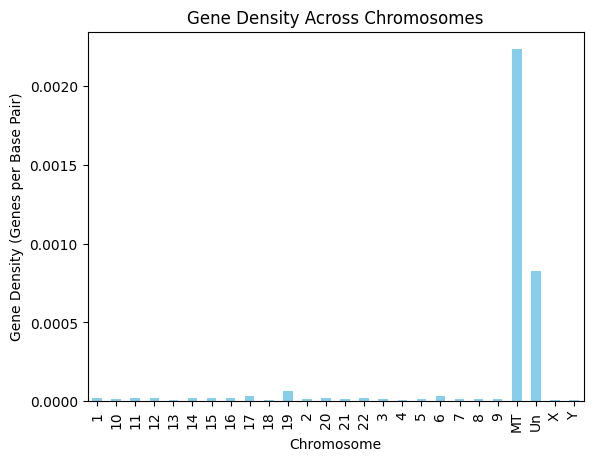

In [32]:
import matplotlib.pyplot as plt
# Count genes per chromosome
gene_counts = final_merged_df.groupby('chrName').size()

# Calculate gene density using chromosome lengths
chromosome_lengths = final_merged_df.groupby('chrName')['length'].first()
gene_density = gene_counts / chromosome_lengths

# Plot gene density across chromosomes
gene_density.plot(kind='bar', color='skyblue')
plt.xlabel("Chromosome")
plt.ylabel("Gene Density (Genes per Base Pair)")
plt.title("Gene Density Across Chromosomes")
plt.show()


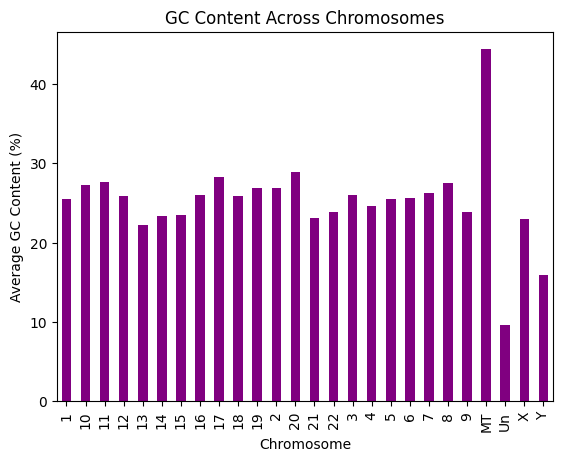

In [33]:
gc_content_by_chromosome = final_merged_df.groupby('chrName')['GC_Content'].mean()
gc_content_by_chromosome.plot(kind='bar', color='purple')
plt.xlabel("Chromosome")
plt.ylabel("Average GC Content (%)")
plt.title("GC Content Across Chromosomes")
plt.show()


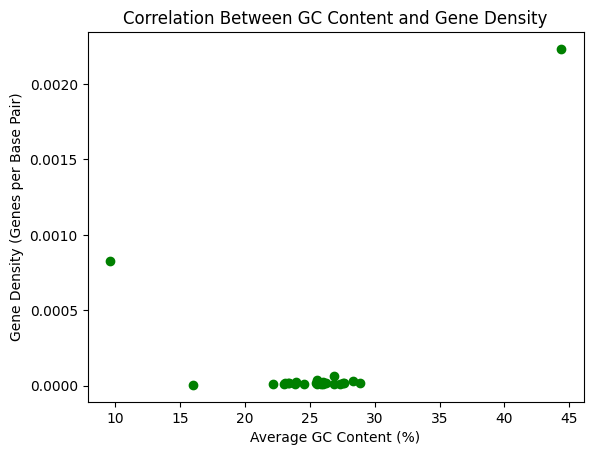

In [34]:
plt.scatter(gc_content_by_chromosome, gene_density, color='green')
plt.xlabel("Average GC Content (%)")
plt.ylabel("Gene Density (Genes per Base Pair)")
plt.title("Correlation Between GC Content and Gene Density")
plt.show()


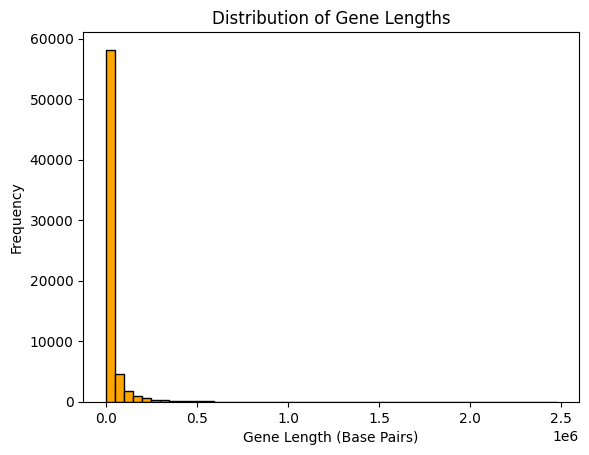

In [35]:
final_merged_df['Length_y'].dropna().plot(kind='hist', bins=50, color='orange', edgecolor='black')
plt.xlabel("Gene Length (Base Pairs)")
plt.ylabel("Frequency")
plt.title("Distribution of Gene Lengths")
plt.show()


In [36]:
# Identify chromosomes with above-average GC content and gene density
high_gc_density_chromosomes = gene_density[(gene_density > gene_density.mean()) &
                                           (gc_content_by_chromosome > gc_content_by_chromosome.mean())]
print("Chromosomes with high GC content and high gene density:")
print(high_gc_density_chromosomes)


Chromosomes with high GC content and high gene density:
chrName
MT    0.002233
dtype: float64


In [37]:
# Filter for a specific gene family in the 'Gene' column (e.g., MIR genes)
mir_genes = final_merged_df[final_merged_df['Gene'].str.contains("MIR", na=False)]
print("MIR Gene Characteristics:")
print(mir_genes[['Gene', 'GC_Content', 'Length_y']].describe())


MIR Gene Characteristics:
        GC_Content       Length_y
count  2477.000000    2238.000000
mean     25.732414    3326.944593
std       2.897843   31506.387252
min      10.592016      41.000000
25%      24.432482      70.000000
50%      25.726378      81.000000
75%      26.685698      94.000000
max      50.480349  571233.000000


In [38]:
# Sort genes by position and check for clusters within close distances
final_merged_df.sort_values(['chrName', 'start'], inplace=True)
final_merged_df['distance_to_next'] = final_merged_df.groupby('chrName')['start'].diff().abs()
clustered_genes = final_merged_df[final_merged_df['distance_to_next'] < 10000]  # Example threshold of 10,000 bp
print("Gene Clusters within 10,000 bp:")
print(clustered_genes[['chrName', 'Gene', 'start', 'end']])


Gene Clusters within 10,000 bp:
      chrName          Gene       start         end
52496       1    PRAMEF22-2       664.0      1240.0
31261       1  LOC105379854      1287.0     72892.0
8201        1      DNAJC8-2      1986.0     26673.0
1752        1    ARHGEF19-2      1991.0     16789.0
62559       1     SLC16A1-2      2426.0     46775.0
...       ...           ...         ...         ...
69723       Y        TTTY15  12662352.0  12692233.0
38924       Y  LOC124905302  17692931.0  17699791.0
14893       Y         HSFY2  18731440.0  18790764.0
69720       Y        TTTY13  21583600.0  21594666.0
69753       Y         TTTY6  22439593.0  22441459.0

[20358 rows x 4 columns]


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Prepare data for clustering
features = pd.DataFrame({
    'Gene Density': gene_density,
    'GC Content': gc_content_by_chromosome,
    'Avg Gene Length': final_merged_df.groupby('chrName')['Length_y'].mean()
}).dropna()

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(reduced_features)

# Visualize clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Chromosome Clustering Based on Structural Features")
plt.show()


ModuleNotFoundError: No module named 'sklearn'

  Using cached scikit_learn-1.5.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
